In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, ggsignif, cowplot, lsmeans, forestplot)

# Functions

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [5]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [6]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [7]:
meta_div$cyclenum <- as.numeric(gsub("X0", "", meta_div$cycle) )

In [8]:
pbmc <- meta_div[ meta_div$sampletype == "PBMC",]
cfdna <- meta_div[ meta_div$sampletype == "cfDNA",]

# 1- Quantrreg for each patient post-therapy

In [9]:
# split to 3 dataframes: one for flow one for tcr and ncr

tcr_df <- pbmc[ !is.na(pbmc$TRB), ]
cftcr_df <- cfdna[ !is.na(cfdna$TRB), ]

flow_df <- pbmc[ !is.na(pbmc$CD3) & pbmc$CD3 > 0, ]
ncr_df <- flow_df[ !is.na(flow_df$`TIM3%`), ]

In [10]:
# remove X01
tcr_df <- tcr_df[ tcr_df$cycle != "X01", ]
cftcr_df <- cftcr_df[ cftcr_df$cycle != "X01", ]

flow_df <- flow_df[ flow_df$cycle != "X01", ]
ncr_df <- ncr_df[ ncr_df$cycle != "X01", ]

In [11]:
# minimum two samples in each dataframe

mytab <- table(tcr_df$Patient, tcr_df$cycle)
mytab <- mytab[rowSums(mytab == 1) >= 2, ] 
tcr_df_min2 <- tcr_df[tcr_df$Patient %in% rownames(mytab), ]

mytab <- table(cftcr_df$Patient, cftcr_df$cycle)
mytab <- mytab[rowSums(mytab == 1) >= 2, ]
cftcr_df_min2 <- cftcr_df[cftcr_df$Patient %in% rownames(mytab), ]

mytab <- table(flow_df$Patient, flow_df$cycle)
mytab <- mytab[rowSums(mytab == 1) >= 2, ] 
flow_df_min2 <- flow_df[flow_df$Patient %in% rownames(mytab), ]

mytab <- table(ncr_df$Patient, ncr_df$cycle)
mytab <- mytab[rowSums(mytab == 1) >= 2, ] 
ncr_df_min2 <- ncr_df[ncr_df$Patient %in% rownames(mytab), ]

In [12]:
tcr_df_min2 <- tcr_df_min2 %>%
    group_by(Patient) %>%
    mutate(quantreg_Shannon = quantreg::rq(observed_Shannon ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
    ungroup()


Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_Shannon = quantreg::rq(observed_Shannon ~ cyclenum,
  tau = 0.5)$coef[2]/n()`.
ℹ In group 7: `Patient = "CHP_343"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”


In [13]:
cftcr_df_min2 <- cftcr_df_min2 %>%
    group_by(Patient) %>%
    mutate(quantreg_cfShannon = quantreg::rq(observed_Shannon ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
    ungroup()


Warning message:
“There were 9 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_cfShannon = quantreg::rq(observed_Shannon ~ cyclenum,
  tau = 0.5)$coef[2]/n()`.
ℹ In group 13: `Patient = "CHP_347"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 8 remaining warnings.”


In [14]:
ncr_df_min2 <- ncr_df_min2 %>%
    group_by(Patient) %>%
    mutate(quantreg_TIM = quantreg::rq(`TIM3%` ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
    mutate(quantreg_LAG = quantreg::rq(`LAG3%` ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
    mutate(quantreg_PD1 = quantreg::rq(`PD1%` ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
    ungroup()


Warning message:
“There were 4 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_TIM = quantreg::rq(`TIM3%` ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
ℹ In group 3: `Patient = "CHP_343"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings.”
Warning message:
“There were 6 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_LAG = quantreg::rq(`LAG3%` ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
ℹ In group 3: `Patient = "CHP_343"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 5 remaining warnings.”
Warning message:
“There were 4 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_PD1 = quantreg::rq(`PD1%` ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
ℹ In group 3: `Patient = "CHP_343"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3

In [15]:
flow_df_min2 <- flow_df_min2 %>%
    group_by(Patient) %>%
    mutate(quantreg_ATC = quantreg::rq(`ATC` ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
    mutate(quantreg_N = quantreg::rq(`Naïve%` ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
    mutate(quantreg_CM = quantreg::rq(`CM%` ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
    mutate(quantreg_SCM = quantreg::rq(`SCM%` ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
    mutate(quantreg_EM = quantreg::rq(`EM%` ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
    mutate(quantreg_TE = quantreg::rq(`TE%` ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
    ungroup()


Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_ATC = quantreg::rq(ATC ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
ℹ In group 2: `Patient = "CHP_332"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”
Warning message:
“There were 5 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_N = quantreg::rq(`Naïve%` ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
ℹ In group 4: `Patient = "CHP_347"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 4 remaining warnings.”
Warning message:
“There were 7 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_CM = quantreg::rq(`CM%` ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
ℹ In group 2: `Patient = "CHP_332"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 6 remaini

In [16]:
head(flow_df_min2)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,sampletype,Group,log10shann,cyclenum,quantreg_ATC,quantreg_N,quantreg_CM,quantreg_SCM,quantreg_EM,quantreg_TE
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_343_02,CHP_343,X02,0.3,459.04,8,EWS,0.3,1135,16,...,PBMC,CHP,1.330860,2,-7.32000,0.1026273,2.8897801,-0.6594274,0.4025038,-2.940411
CHP_343_03,CHP_343,X03,0.6,370.30,8,EWS,0.6,1650,16,...,PBMC,CHP,1.431235,3,-7.32000,0.1026273,2.8897801,-0.6594274,0.4025038,-2.940411
CHP_343_04,CHP_343,X04,1.5,536.63,8,EWS,1.5,2612,146,...,PBMC,CHP,1.450588,4,-7.32000,0.1026273,2.8897801,-0.6594274,0.4025038,-2.940411
CHP_343_05,CHP_343,X05,2.1,371.20,8,EWS,2.1,2436,152,...,PBMC,CHP,1.427713,5,-7.32000,0.1026273,2.8897801,-0.6594274,0.4025038,-2.940411
CHP_347_02,CHP_347,X02,6.4,1038.59,13,ALL,6.4,927,15,...,PBMC,CHP,2.447600,2,20.02333,-0.6003918,-0.6090838,-1.0940369,-0.1080237,2.652185
CHP_347_03,CHP_347,X03,37.6,768.80,13,ALL,37.6,2379,27,...,PBMC,CHP,1.841165,3,20.02333,-0.6003918,-0.6090838,-1.0940369,-0.1080237,2.652185


In [17]:
flow_df_min2_pt <- flow_df_min2[ !duplicated(flow_df_min2$Patient), ]
ncr_df_min2_pt <- ncr_df_min2[ !duplicated(ncr_df_min2$Patient), ]
tcr_df_min2_pt <- tcr_df_min2[ !duplicated(tcr_df_min2$Patient), ]
cftcr_df_min2_pt <- cftcr_df_min2[ !duplicated(cftcr_df_min2$Patient), ]

In [18]:
colnames(cftcr_df_min2_pt)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "CD3"               
[10] "EM"                 "CM"                 "Naïve"             
[13] "SCM"                "TE"                 "EM%"               
[16] "CM%"                "Naïve%"             "SCM%"              
[19] "TE%"                "Naïve/TE"           "N+CM+SCM/TE+EM"    
[22] "PD-1"               "PDL1"               "LAG3"              
[25] "TIM3"               "CTLA4"              "PD1%"              
[28] "PDL1%"              "LAG3%"              "TIM3%"             
[31] "CTLA4%"             "Any NCR"            "PD1 + LAG3 + TIM3" 
[34] "cancergroup"        "agegroup"           "foldgroup"         
[37] "Remission"          "Relapse"            "Transplant"        
[40] "CART"               "vital_status"       "LOF"               
[43] "TRB"                "Reads"              "CPKR"              
[46] "Average_reads"      "VMR"                "Max_reads"         
[49] "Singletons"         "Doubletons"         "qD"                
[52] "Sample_Coverage"    "observed_Richness"  "estimated_Richness"
[55] "SE_Richeness"       "observed_Shannon"   "estimated_Shannon" 
[58] "SE_Shannon"         "observed_Simpson"   "estimated_Simpson" 
[61] "SE_Simpson"         "basename"           "file"              
[64] "sampletype"         "Group"              "log10shann"        
[67] "cyclenum"           "quantreg_cfShannon"

In [19]:
# merge all the dataframes, allow NAs to include all data
df_min2_pt <- merge(flow_df_min2_pt, ncr_df_min2_pt[, c("Patient", "quantreg_TIM", "quantreg_LAG", "quantreg_PD1")], by = "Patient", all = TRUE)
df_min2_pt <- merge(df_min2_pt, tcr_df_min2_pt[, c("Patient", "quantreg_Shannon")], by = "Patient", , all = TRUE)
df_min2_pt <- merge(df_min2_pt, cftcr_df_min2_pt[, c("Patient", "quantreg_cfShannon")], by = "Patient", all = TRUE)


In [20]:
colnames(df_min2_pt)

[1] "Patient"            "sample_id"          "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "CD3"               
[10] "EM"                 "CM"                 "Naïve"             
[13] "SCM"                "TE"                 "EM%"               
[16] "CM%"                "Naïve%"             "SCM%"              
[19] "TE%"                "Naïve/TE"           "N+CM+SCM/TE+EM"    
[22] "PD-1"               "PDL1"               "LAG3"              
[25] "TIM3"               "CTLA4"              "PD1%"              
[28] "PDL1%"              "LAG3%"              "TIM3%"             
[31] "CTLA4%"             "Any NCR"            "PD1 + LAG3 + TIM3" 
[34] "cancergroup"        "agegroup"           "foldgroup"         
[37] "Remission"          "Relapse"            "Transplant"        
[40] "CART"               "vital_status"       "LOF"               
[43] "TRB"                "Reads"              "CPKR"              
[46] "Average_reads"      "VMR"                "Max_reads"         
[49] "Singletons"         "Doubletons"         "qD"                
[52] "Sample_Coverage"    "observed_Richness"  "estimated_Richness"
[55] "SE_Richeness"       "observed_Shannon"   "estimated_Shannon" 
[58] "SE_Shannon"         "observed_Simpson"   "estimated_Simpson" 
[61] "SE_Simpson"         "basename"           "file"              
[64] "sampletype"         "Group"              "log10shann"        
[67] "cyclenum"           "quantreg_ATC"       "quantreg_N"        
[70] "quantreg_CM"        "quantreg_SCM"       "quantreg_EM"       
[73] "quantreg_TE"        "quantreg_TIM"       "quantreg_LAG"      
[76] "quantreg_PD1"       "quantreg_Shannon"   "quantreg_cfShannon"

In [21]:
mycol <- colnames(df_min2_pt)[grepl("quantreg", colnames(df_min2_pt))]

In [22]:
mycol

[1] "quantreg_ATC"       "quantreg_N"         "quantreg_CM"       
 [4] "quantreg_SCM"       "quantreg_EM"        "quantreg_TE"       
 [7] "quantreg_TIM"       "quantreg_LAG"       "quantreg_PD1"      
[10] "quantreg_Shannon"   "quantreg_cfShannon"

In [23]:
# scale
for(i in mycol){
    newvar <- paste0(i, "_scaled")
df_min2_pt[[newvar]] <- as.vector(scale(df_min2_pt[[i]]))
}

In [24]:
# # rank
# for(i in mycol){
#     newvar <- paste0(i, "_rank")
# df_min2_pt[[newvar]] <- rank(df_min2_pt[[i]])
# }

In [25]:
min(df_min2_pt$quantreg_LAG, na.rm = TRUE)

[1] -4.776677

In [26]:
mycol <- colnames(df_min2_pt)[grepl("scaled", colnames(df_min2_pt))]

In [27]:
mycol

[1] "quantreg_ATC_scaled"       "quantreg_N_scaled"        
 [3] "quantreg_CM_scaled"        "quantreg_SCM_scaled"      
 [5] "quantreg_EM_scaled"        "quantreg_TE_scaled"       
 [7] "quantreg_TIM_scaled"       "quantreg_LAG_scaled"      
 [9] "quantreg_PD1_scaled"       "quantreg_Shannon_scaled"  
[11] "quantreg_cfShannon_scaled"

In [28]:
table(df_min2_pt$cancergroup)


           Leukemia            Lymphoma        Solid tumors T-cell malignancies 
                 17                   7                  18                   1 

In [29]:
df_min2_pt_long <- tidyr::pivot_longer(df_min2_pt, all_of(mycol), names_to = "Feature", values_to = "Quantreg")

In [30]:
df_min2_pt_long <- as.data.frame(df_min2_pt_long)

In [31]:
df_min2_pt_long_narm <- df_min2_pt_long[ !is.na(df_min2_pt_long$Quantreg),]

Boxplot

In [32]:
# use scaled for viz
df_min2_pt_long_narm$Featurename <- gsub("_scaled", "", df_min2_pt_long_narm$Feature)
df_min2_pt_long_narm$Featurename <- gsub("quantreg_", "", df_min2_pt_long_narm$Featurename)

In [33]:
head(df_min2_pt_long_narm)

,Patient,sample_id,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,quantreg_EM,quantreg_TE,quantreg_TIM,quantreg_LAG,quantreg_PD1,quantreg_Shannon,quantreg_cfShannon,Feature,Quantreg,Featurename
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
10,CHP_323,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,11.00775,-8.6880,quantreg_Shannon_scaled,0.1261740,Shannon
11,CHP_323,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,11.00775,-8.6880,quantreg_cfShannon_scaled,-2.7655815,cfShannon
22,CHP_324,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,0.3875,quantreg_cfShannon_scaled,0.1105124,cfShannon
32,CHP_328,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,-68.21300,NA,quantreg_Shannon_scaled,-0.7535216,Shannon
34,CHP_330,CHP_330_02,X02,1.9,0,5,OS,1.9,2425,21,...,0.6943711,-2.439663,-2.179917,-1.690379,-2.179917,NA,NA,quantreg_ATC_scaled,0.4452155,ATC
35,CHP_330,CHP_330_02,X02,1.9,0,5,OS,1.9,2425,21,...,0.6943711,-2.439663,-2.179917,-1.690379,-2.179917,NA,NA,quantreg_N_scaled,0.8778270,N


In [34]:
table(df_min2_pt_long_narm$cancergroup)


           Leukemia            Lymphoma        Solid tumors T-cell malignancies 
                169                  73                 180                  11 

In [35]:
table(df_min2_pt_long_narm$Featurename)


      ATC cfShannon        CM        EM       LAG         N       PD1       SCM 
       43        64        43        43        39        43        39        43 
  Shannon        TE       TIM 
       50        43        39 

In [36]:
df_min2_pt_long_narm$Featurename <- factor(df_min2_pt_long_narm$Featurename,
    levels = c("ATC", "N", "SCM", "CM", "EM", "TE", "PD1", "TIM","LAG",  "Shannon", "cfShannon")
)


In [37]:
df_min2_pt_long_narm$Featurename <- factor(df_min2_pt_long_narm$Featurename,
    levels = rev(levels(df_min2_pt_long_narm$Featurename))
)


In [38]:
head(df_min2_pt_long_narm)

,Patient,sample_id,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,quantreg_EM,quantreg_TE,quantreg_TIM,quantreg_LAG,quantreg_PD1,quantreg_Shannon,quantreg_cfShannon,Feature,Quantreg,Featurename
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>
10,CHP_323,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,11.00775,-8.6880,quantreg_Shannon_scaled,0.1261740,Shannon
11,CHP_323,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,11.00775,-8.6880,quantreg_cfShannon_scaled,-2.7655815,cfShannon
22,CHP_324,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,0.3875,quantreg_cfShannon_scaled,0.1105124,cfShannon
32,CHP_328,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,-68.21300,NA,quantreg_Shannon_scaled,-0.7535216,Shannon
34,CHP_330,CHP_330_02,X02,1.9,0,5,OS,1.9,2425,21,...,0.6943711,-2.439663,-2.179917,-1.690379,-2.179917,NA,NA,quantreg_ATC_scaled,0.4452155,ATC
35,CHP_330,CHP_330_02,X02,1.9,0,5,OS,1.9,2425,21,...,0.6943711,-2.439663,-2.179917,-1.690379,-2.179917,NA,NA,quantreg_N_scaled,0.8778270,N


In [39]:
df_min2_pt_long_narm$Feature <- NA
df_min2_pt_long_narm$Feature[ df_min2_pt_long_narm$Featurename == "ATC"] <- "ATC"
df_min2_pt_long_narm$Feature[ df_min2_pt_long_narm$Featurename == "N"] <- "Naïve%"
df_min2_pt_long_narm$Feature[ df_min2_pt_long_narm$Featurename == "SCM"] <- "SCM%"
df_min2_pt_long_narm$Feature[ df_min2_pt_long_narm$Featurename == "CM"] <- "CM%"
df_min2_pt_long_narm$Feature[ df_min2_pt_long_narm$Featurename == "EM"] <- "EM%"
df_min2_pt_long_narm$Feature[ df_min2_pt_long_narm$Featurename == "TE"] <- "TE%"
df_min2_pt_long_narm$Feature[ df_min2_pt_long_narm$Featurename == "PD1"] <- "PD1%"
df_min2_pt_long_narm$Feature[ df_min2_pt_long_narm$Featurename == "LAG"] <- "LAG3%"
df_min2_pt_long_narm$Feature[ df_min2_pt_long_narm$Featurename == "TIM"] <- "TIM3%"
df_min2_pt_long_narm$Feature[ df_min2_pt_long_narm$Featurename == "Shannon"] <- "TCR Shannon"
df_min2_pt_long_narm$Feature[ df_min2_pt_long_narm$Featurename == "cfShannon"] <- "cfTCR Shannon"

In [40]:
df_min2_pt_long_narm$Feature <- factor(df_min2_pt_long_narm$Feature,
  levels = c("cfTCR Shannon", "TCR Shannon", "LAG3%","TIM3%", "PD1%", "TE%", "EM%", "CM%", "SCM%", "Naïve%", "ATC")
)


In [41]:
head(df_min2_pt_long_narm)

,Patient,sample_id,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,quantreg_EM,quantreg_TE,quantreg_TIM,quantreg_LAG,quantreg_PD1,quantreg_Shannon,quantreg_cfShannon,Feature,Quantreg,Featurename
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
10,CHP_323,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,11.00775,-8.6880,TCR Shannon,0.1261740,Shannon
11,CHP_323,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,11.00775,-8.6880,cfTCR Shannon,-2.7655815,cfShannon
22,CHP_324,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,0.3875,cfTCR Shannon,0.1105124,cfShannon
32,CHP_328,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,-68.21300,NA,TCR Shannon,-0.7535216,Shannon
34,CHP_330,CHP_330_02,X02,1.9,0,5,OS,1.9,2425,21,...,0.6943711,-2.439663,-2.179917,-1.690379,-2.179917,NA,NA,ATC,0.4452155,ATC
35,CHP_330,CHP_330_02,X02,1.9,0,5,OS,1.9,2425,21,...,0.6943711,-2.439663,-2.179917,-1.690379,-2.179917,NA,NA,Naïve%,0.8778270,N


In [42]:
p1 <- ggplot(df_min2_pt_long_narm, aes(y = Feature, x = Quantreg)) +
        geom_point(aes(color = cancergroup), position = position_jitter(w = 0.05, h = 0.15)) +
        geom_boxplot(outlier.shape = NA, alpha = 0, color = "#b7b2b2") +
        myaxis +
        myplot +
        scale_color_manual(values = group_col) +
        theme(legend.position = "none", axis.title = element_blank(), axis.text.x = element_text(angle = 0, hjust = 0.5)) +
        labs(title = "Scaled change post-therapy")


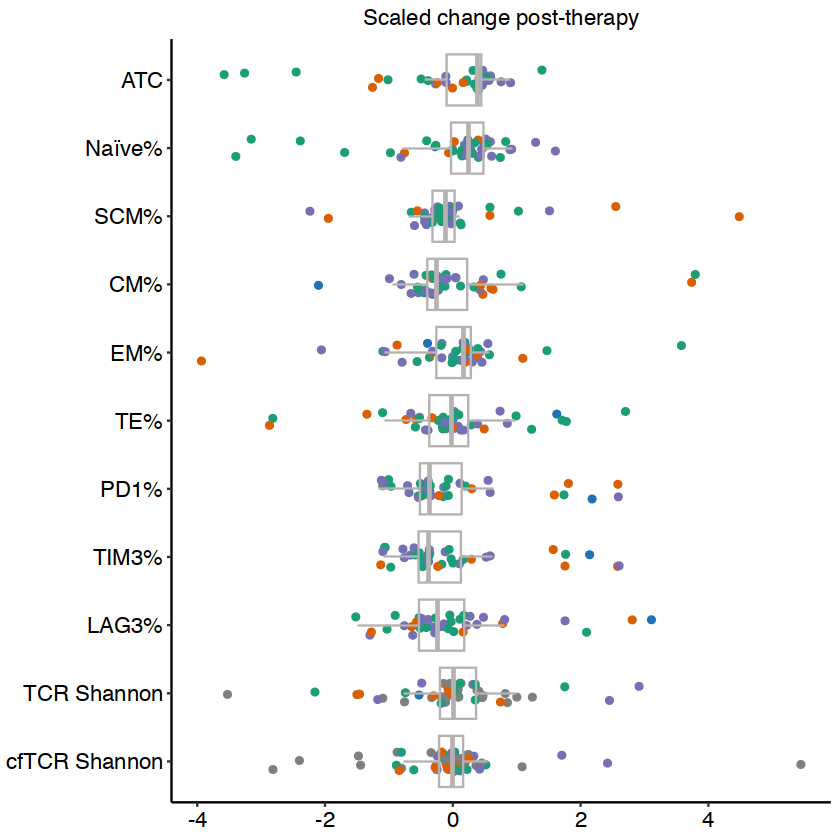

In [43]:
p1

In [52]:
pdf( paste0(plotpath, "quantreq.pdf"), width = 6, height = 8)
cowplot::plot_grid(p1, labels = "B") #+ theme(legend.position = "bottom")
dev.off()

pdf 
  2

In [162]:
# get legends vertical at the bottom
pdf(paste0(plotpath, "quantreq_lgd.pdf"), width = 3, height = 6)
grid.draw(get_legend(p1 + theme(legend.position = "bottom") + guides(color = guide_legend(ncol = 2))))
dev.off()


pdf 
  2

LR and forestplot

Use unscaled data for glm

In [44]:
mycol <- colnames(df_min2_pt)[grepl("quantreg", colnames(df_min2_pt))]

In [45]:
mycol <- mycol[ !grepl("scaled", mycol)]

In [46]:
# mycol <- mycol[ !grepl("rank", mycol)]

In [47]:
mycol

[1] "quantreg_ATC"       "quantreg_N"         "quantreg_CM"       
 [4] "quantreg_SCM"       "quantreg_EM"        "quantreg_TE"       
 [7] "quantreg_TIM"       "quantreg_LAG"       "quantreg_PD1"      
[10] "quantreg_Shannon"   "quantreg_cfShannon"

In [48]:
df_min2_pt_long <- tidyr::pivot_longer(df_min2_pt, all_of(mycol), names_to = "Feature", values_to = "Quantreg")

In [49]:
df_min2_pt_long <- as.data.frame(df_min2_pt_long)

In [50]:
df_min2_pt_long_narm <- df_min2_pt_long[ !is.na(df_min2_pt_long$Quantreg),]

In [53]:
length(unique(df_min2_pt_long_narm$Patient) )

[1] 81

In [54]:
feat_lr_mat <- matrix(nrow = length(unique(df_min2_pt_long_narm$Feature)), ncol = 7)
rownames(feat_lr_mat) <- unique(df_min2_pt_long_narm$Feature)
colnames(feat_lr_mat) <- c("coef", "exp(coef)", "SE", "z", "Pr(>|z|)", "lower.95", "upper.95")


In [55]:
feat_lr_mat

,coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95
quantreg_Shannon,NA,NA,NA,NA,NA,NA,NA
quantreg_cfShannon,NA,NA,NA,NA,NA,NA,NA
quantreg_ATC,NA,NA,NA,NA,NA,NA,NA
quantreg_N,NA,NA,NA,NA,NA,NA,NA
quantreg_CM,NA,NA,NA,NA,NA,NA,NA
quantreg_SCM,NA,NA,NA,NA,NA,NA,NA
quantreg_EM,NA,NA,NA,NA,NA,NA,NA
quantreg_TE,NA,NA,NA,NA,NA,NA,NA
quantreg_TIM,NA,NA,NA,NA,NA,NA,NA
quantreg_LAG,NA,NA,NA,NA,NA,NA,NA


In [56]:
for (i in rownames(feat_lr_mat)) {
    # message(i)
    f <- as.formula(paste0("Relapse~", i, "")) # lets just do univariate
    lrmodel <- glm(f, data = df_min2_pt, family = "binomial")
    sumlrmodel <- summary(lrmodel)
    # print(sumlrmodel)
    myCI <- exp(confint.default(lrmodel, level = 0.95))

    feat_lr_mat[i, "coef"] <- sumlrmodel$coefficients[2, "Estimate"]
    # exp of estimate is the odds ratio
    feat_lr_mat[i, "exp(coef)"] <- exp(sumlrmodel$coefficients[2, "Estimate"])
    feat_lr_mat[i, "SE"] <- sumlrmodel$coefficients[2, "Std. Error"]
    feat_lr_mat[i, "z"] <- sumlrmodel$coefficients[2, "z value"]
    feat_lr_mat[i, "Pr(>|z|)"] <- sumlrmodel$coefficients[2, "Pr(>|z|)"]
    # from myCI
    feat_lr_mat[i, "lower.95"] <- myCI[2, 1]
    feat_lr_mat[i, "upper.95"] <- myCI[2, 2]
}


In [57]:
feat_lr_mat

,coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95
quantreg_Shannon,0.001913041,1.0019149,0.005446435,0.3512465,0.7254034,0.9912765,1.012667
quantreg_cfShannon,0.042255542,1.0431610,0.257068408,0.1643747,0.8694362,0.6302812,1.726507
quantreg_ATC,0.002657979,1.0026615,0.004079771,0.6515019,0.5147225,0.9946760,1.010711
quantreg_N,-0.035787994,0.9648448,0.044648869,-0.8015431,0.4228173,0.8840000,1.053083
quantreg_CM,0.067199024,1.0695083,0.042561642,1.5788635,0.1143674,0.9839106,1.162553
quantreg_SCM,-0.035472382,0.9651494,0.083814848,-0.4232231,0.6721325,0.8189384,1.137465
quantreg_EM,0.157997086,1.1711628,0.130558635,1.2101619,0.2262168,0.9067458,1.512687
quantreg_TE,-0.028011483,0.9723772,0.032513585,-0.8615317,0.3889453,0.9123451,1.036359
quantreg_TIM,-0.042439051,0.9584489,0.069642210,-0.6093869,0.5422680,0.8361600,1.098623
quantreg_LAG,0.040509058,1.0413407,0.111267070,0.3640705,0.7158054,0.8373021,1.295101


In [58]:
fdr_df <- as.matrix(p.adjust(feat_lr_mat[,5], method = "fdr"))
colnames(fdr_df)[1] <- "fdr"
feat_lr_mat <- cbind(feat_lr_mat, fdr_df)

In [59]:
feat_lr_mat <- as.data.frame(feat_lr_mat)

In [60]:
feat_lr_mat$Feature <- gsub("quantreg_", "", rownames(feat_lr_mat))
# feat_lr_mat$Feature <- gsub("_rank", "", feat_lr_mat$Feature)

In [61]:
(feat_lr_mat)

,coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95,fdr,Feature
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
quantreg_Shannon,0.001913041,1.0019149,0.005446435,0.3512465,0.7254034,0.9912765,1.012667,0.7979438,Shannon
quantreg_cfShannon,0.042255542,1.0431610,0.257068408,0.1643747,0.8694362,0.6302812,1.726507,0.8694362,cfShannon
quantreg_ATC,0.002657979,1.0026615,0.004079771,0.6515019,0.5147225,0.9946760,1.010711,0.7979438,ATC
quantreg_N,-0.035787994,0.9648448,0.044648869,-0.8015431,0.4228173,0.8840000,1.053083,0.7979438,N
quantreg_CM,0.067199024,1.0695083,0.042561642,1.5788635,0.1143674,0.9839106,1.162553,0.7979438,CM
quantreg_SCM,-0.035472382,0.9651494,0.083814848,-0.4232231,0.6721325,0.8189384,1.137465,0.7979438,SCM
quantreg_EM,0.157997086,1.1711628,0.130558635,1.2101619,0.2262168,0.9067458,1.512687,0.7979438,EM
quantreg_TE,-0.028011483,0.9723772,0.032513585,-0.8615317,0.3889453,0.9123451,1.036359,0.7979438,TE
quantreg_TIM,-0.042439051,0.9584489,0.069642210,-0.6093869,0.5422680,0.8361600,1.098623,0.7979438,TIM


In [62]:
feat_lr_mat$Feature[ feat_lr_mat$Feature == "N"] <- "Naïve%"
feat_lr_mat$Feature[ feat_lr_mat$Feature == "SCM"] <- "SCM%"
feat_lr_mat$Feature[ feat_lr_mat$Feature == "CM"] <- "CM%"
feat_lr_mat$Feature[ feat_lr_mat$Feature == "EM"] <- "EM%"
feat_lr_mat$Feature[ feat_lr_mat$Feature == "TE"] <- "TE%"
feat_lr_mat$Feature[ feat_lr_mat$Feature == "PD1"] <- "PD1%"
feat_lr_mat$Feature[ feat_lr_mat$Feature == "LAG"] <- "LAG3%"
feat_lr_mat$Feature[ feat_lr_mat$Feature == "TIM"] <- "TIM3%"
feat_lr_mat$Feature[ feat_lr_mat$Feature == "Shannon"] <- "TCR Shannon"
feat_lr_mat$Feature[ feat_lr_mat$Feature == "cfShannon"] <- "cfTCR Shannon"

In [63]:
feat_lr_mat$Feature <- factor(feat_lr_mat$Feature,
  levels = c("cfTCR Shannon", "TCR Shannon","LAG3%","TIM3%",  "PD1%", "TE%", "EM%", "CM%", "SCM%", "Naïve%", "ATC")
)

# reverse the levels
feat_lr_mat$Feature <- factor(feat_lr_mat$Feature,
  levels = rev(levels(feat_lr_mat$Feature))
)

In [64]:
# order mat by Feature levels
feat_lr_mat <- feat_lr_mat[ order(feat_lr_mat$Feature), ]

In [65]:
(feat_lr_mat)

,coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95,fdr,Feature
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
quantreg_ATC,0.002657979,1.0026615,0.004079771,0.6515019,0.5147225,0.9946760,1.010711,0.7979438,ATC
quantreg_N,-0.035787994,0.9648448,0.044648869,-0.8015431,0.4228173,0.8840000,1.053083,0.7979438,Naïve%
quantreg_SCM,-0.035472382,0.9651494,0.083814848,-0.4232231,0.6721325,0.8189384,1.137465,0.7979438,SCM%
quantreg_CM,0.067199024,1.0695083,0.042561642,1.5788635,0.1143674,0.9839106,1.162553,0.7979438,CM%
quantreg_EM,0.157997086,1.1711628,0.130558635,1.2101619,0.2262168,0.9067458,1.512687,0.7979438,EM%
quantreg_TE,-0.028011483,0.9723772,0.032513585,-0.8615317,0.3889453,0.9123451,1.036359,0.7979438,TE%
quantreg_PD1,-0.037943646,0.9627672,0.066957316,-0.5666841,0.5709288,0.8443590,1.097780,0.7979438,PD1%
quantreg_TIM,-0.042439051,0.9584489,0.069642210,-0.6093869,0.5422680,0.8361600,1.098623,0.7979438,TIM3%
quantreg_LAG,0.040509058,1.0413407,0.111267070,0.3640705,0.7158054,0.8373021,1.295101,0.7979438,LAG3%


In [66]:
feat_lr_mat$mean <- feat_lr_mat$`exp(coef)`
feat_lr_mat$lower <- feat_lr_mat$`lower.95`
feat_lr_mat$upper <- feat_lr_mat$`upper.95`

In [67]:
feat_lr_mat$OR <- as.character(round(feat_lr_mat$`exp(coef)`, 2) )
feat_lr_mat$p <- as.character(round(feat_lr_mat$`Pr(>|z|)`, 2) )
feat_lr_mat$FDR <- as.character(round(feat_lr_mat$fdr, 2) )

In [68]:
p2 <- feat_lr_mat |>
  forestplot(
    labeltext = c(Feature, OR, p, FDR),
    clip = c(-0.5, 2.5),
    boxsize = 0.2,
    vertices = TRUE,
    xlog = FALSE, zero = 1
  ) |>
  fp_set_style(
    box = "royalblue",
    line = "darkblue",
    summary = "royalblue"
  ) |>
  fp_add_header(
    Feature = c("", "Feature"),
    OR = c("", "OR"),
    p = c("", "p value"),
    FDR = c("", "FDR")
  )


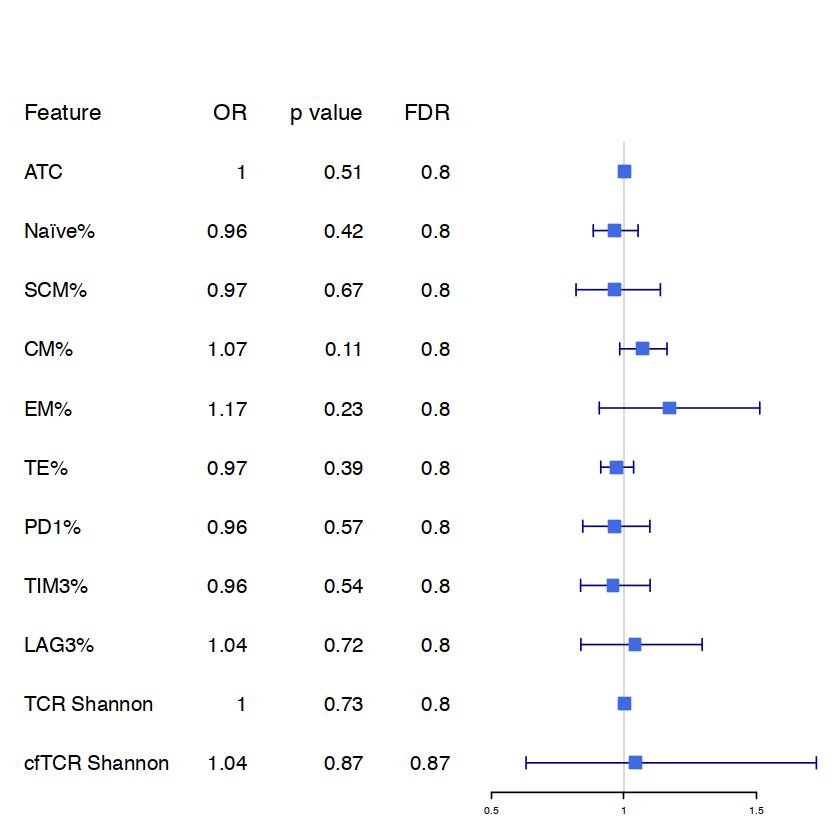

In [69]:
p2

In [70]:
pdf(paste0(plotpath, "forestplot_quantreq.pdf"), width=5, height=8)
p2
dev.off()

pdf 
  2

# 2- Baseline associations

In [71]:
# split to 3 dataframes: one for flow one for tcr and ncr

tcr_df <- pbmc[ !is.na(pbmc$TRB), ]
cftcr_df <- cfdna[ !is.na(cfdna$TRB), ]
flow_df <- pbmc[ !is.na(pbmc$CD3) & pbmc$CD3 > 0, ]
ncr_df <- flow_df[ !is.na(flow_df$`TIM3%`), ]

In [72]:
# only X01
tcr_df <- tcr_df[ tcr_df$cycle == "X01", ]
cftcr_df <- cftcr_df[ cftcr_df$cycle == "X01", ]
flow_df <- flow_df[ flow_df$cycle == "X01", ]
ncr_df <- ncr_df[ ncr_df$cycle == "X01", ]

In [73]:
colnames(tcr_df)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "CD3"               
[10] "EM"                 "CM"                 "Naïve"             
[13] "SCM"                "TE"                 "EM%"               
[16] "CM%"                "Naïve%"             "SCM%"              
[19] "TE%"                "Naïve/TE"           "N+CM+SCM/TE+EM"    
[22] "PD-1"               "PDL1"               "LAG3"              
[25] "TIM3"               "CTLA4"              "PD1%"              
[28] "PDL1%"              "LAG3%"              "TIM3%"             
[31] "CTLA4%"             "Any NCR"            "PD1 + LAG3 + TIM3" 
[34] "cancergroup"        "agegroup"           "foldgroup"         
[37] "Remission"          "Relapse"            "Transplant"        
[40] "CART"               "vital_status"       "LOF"               
[43] "TRB"                "Reads"              "CPKR"              
[46] "Average_reads"      "VMR"                "Max_reads"         
[49] "Singletons"         "Doubletons"         "qD"                
[52] "Sample_Coverage"    "observed_Richness"  "estimated_Richness"
[55] "SE_Richeness"       "observed_Shannon"   "estimated_Shannon" 
[58] "SE_Shannon"         "observed_Simpson"   "estimated_Simpson" 
[61] "SE_Simpson"         "basename"           "file"              
[64] "sampletype"         "Group"              "log10shann"        
[67] "cyclenum"

In [74]:
cftcr_df$cfShannon <- cftcr_df$observed_Shannon

In [75]:
# merge all the dataframes, allow NAs to include all data
df_x01 <- merge(flow_df[, c("Patient", "ATC", "Naïve%", "SCM%", "CM%", "EM%", "TE%")], ncr_df[, c("Patient", "PD1%", "LAG3%", "TIM3%")], by = "Patient", all = TRUE)
df_x01 <- merge(df_x01, tcr_df[, c("Patient", "observed_Shannon")], by = "Patient", , all = TRUE)
df_x01 <- merge(df_x01, cftcr_df[, c("Patient","cfShannon")], by = "Patient", all = TRUE)


In [76]:
df_x01$cancergroup <- pbmc$cancergroup[ match(df_x01$Patient, pbmc$Patient) ]

In [77]:
head(df_x01)

,Patient,ATC,Naïve%,SCM%,CM%,EM%,TE%,PD1%,LAG3%,TIM3%,observed_Shannon,cfShannon,cancergroup
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,CHP_330,0.0,12.925728,7.6733689,2.6672138,0.98481740,75.748872,4.636849,2.749282,4.636849,NA,NA,Solid tumors
2,CHP_332,0.0,7.138920,22.8500551,8.1863286,0.02756340,61.797133,9.371555,7.414553,9.371555,NA,NA,Solid tumors
3,CHP_343,219.3,9.541512,2.3130938,8.4262701,0.04130525,79.677819,7.889302,5.700124,7.889302,NA,1.000,Solid tumors
4,CHP_344,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,6.587,Lymphoma
5,CHP_345,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,18.714,Leukemia
6,CHP_346,331.7,94.662480,0.1569859,0.7849294,0.00000000,4.395604,5.180534,3.767661,5.180534,29.129,NA,Solid tumors


In [78]:
mycol <- c(
    "EM%", "CM%", "Naïve%", "SCM%", "TE%",
    "PD1%", "TIM3%", "LAG3%", "ATC",
    "observed_Shannon", "cfShannon"
)


In [79]:
mycol

[1] "EM%"              "CM%"              "Naïve%"           "SCM%"            
 [5] "TE%"              "PD1%"             "TIM3%"            "LAG3%"           
 [9] "ATC"              "observed_Shannon" "cfShannon"

In [80]:
# scale
for (i in mycol) {
    print(i)
    newvar <- paste0(i, "_scaled")
    df_x01[[newvar]] <- as.vector(scale(df_x01[[i]]))
}


[1] "EM%"
[1] "CM%"
[1] "Naïve%"
[1] "SCM%"
[1] "TE%"
[1] "PD1%"
[1] "TIM3%"
[1] "LAG3%"
[1] "ATC"
[1] "observed_Shannon"
[1] "cfShannon"


In [81]:
# # rank
# for(i in mycol){
#     newvar <- paste0(i, "_rank")
# df_x01[[newvar]] <- rank(df_x01[[i]])
# }

In [82]:
mycol <- colnames(df_x01)[grepl("scaled", colnames(df_x01))]

In [83]:
mycol

[1] "EM%_scaled"              "CM%_scaled"             
 [3] "Naïve%_scaled"           "SCM%_scaled"            
 [5] "TE%_scaled"              "PD1%_scaled"            
 [7] "TIM3%_scaled"            "LAG3%_scaled"           
 [9] "ATC_scaled"              "observed_Shannon_scaled"
[11] "cfShannon_scaled"

In [84]:
table(df_x01$cancergroup)


           Leukemia            Lymphoma        Solid tumors T-cell malignancies 
                 37                  14                  30                   4 

In [85]:
df_x01_long <- tidyr::pivot_longer(df_x01, all_of(mycol), names_to = "Feature", values_to = "X01")

In [86]:
df_x01_long <- as.data.frame(df_x01_long)

In [87]:
df_x01_long_narm <- df_x01_long[ !is.na(df_x01_long$X01),]

In [88]:
head(df_x01_long_narm)

,Patient,ATC,Naïve%,SCM%,CM%,EM%,TE%,PD1%,LAG3%,TIM3%,observed_Shannon,cfShannon,cancergroup,Feature,X01
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,CHP_330,0,12.92573,7.673369,2.667214,0.9848174,75.74887,4.636849,2.749282,4.636849,NA,NA,Solid tumors,EM%_scaled,-0.4613281
2,CHP_330,0,12.92573,7.673369,2.667214,0.9848174,75.74887,4.636849,2.749282,4.636849,NA,NA,Solid tumors,CM%_scaled,-0.5935775
3,CHP_330,0,12.92573,7.673369,2.667214,0.9848174,75.74887,4.636849,2.749282,4.636849,NA,NA,Solid tumors,Naïve%_scaled,-0.7172710
4,CHP_330,0,12.92573,7.673369,2.667214,0.9848174,75.74887,4.636849,2.749282,4.636849,NA,NA,Solid tumors,SCM%_scaled,0.1325379
5,CHP_330,0,12.92573,7.673369,2.667214,0.9848174,75.74887,4.636849,2.749282,4.636849,NA,NA,Solid tumors,TE%_scaled,0.9093799
6,CHP_330,0,12.92573,7.673369,2.667214,0.9848174,75.74887,4.636849,2.749282,4.636849,NA,NA,Solid tumors,PD1%_scaled,-0.5543962


Boxplot

In [89]:
# use scaled for viz
df_x01_long_narm$Featurename <- gsub("_scaled", "", df_x01_long_narm$Feature)

In [90]:
table(df_x01_long_narm$Featurename )


             ATC        cfShannon              CM%              EM% 
              64               55               65               65 
           LAG3%           Naïve% observed_Shannon             PD1% 
              62               65               44               62 
            SCM%              TE%            TIM3% 
              65               65               62 

In [91]:
df_x01_long_narm$Featurename[ df_x01_long_narm$Featurename == "cfShannon"] <- "cfTCR Shannon"
df_x01_long_narm$Featurename[ df_x01_long_narm$Featurename == "observed_Shannon"] <- "TCR Shannon"



In [92]:
df_x01_long_narm$Featurename <- factor(df_x01_long_narm$Featurename,
  levels = c(
    "cfTCR Shannon", "TCR Shannon",
    "LAG3%", "TIM3%", "PD1%", "TE%", "EM%", "CM%", "SCM%", "Naïve%", "ATC"
  )
)


In [93]:
head(df_x01_long_narm)

,Patient,ATC,Naïve%,SCM%,CM%,EM%,TE%,PD1%,LAG3%,TIM3%,observed_Shannon,cfShannon,cancergroup,Feature,X01,Featurename
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<fct>
1,CHP_330,0,12.92573,7.673369,2.667214,0.9848174,75.74887,4.636849,2.749282,4.636849,NA,NA,Solid tumors,EM%_scaled,-0.4613281,EM%
2,CHP_330,0,12.92573,7.673369,2.667214,0.9848174,75.74887,4.636849,2.749282,4.636849,NA,NA,Solid tumors,CM%_scaled,-0.5935775,CM%
3,CHP_330,0,12.92573,7.673369,2.667214,0.9848174,75.74887,4.636849,2.749282,4.636849,NA,NA,Solid tumors,Naïve%_scaled,-0.7172710,Naïve%
4,CHP_330,0,12.92573,7.673369,2.667214,0.9848174,75.74887,4.636849,2.749282,4.636849,NA,NA,Solid tumors,SCM%_scaled,0.1325379,SCM%
5,CHP_330,0,12.92573,7.673369,2.667214,0.9848174,75.74887,4.636849,2.749282,4.636849,NA,NA,Solid tumors,TE%_scaled,0.9093799,TE%
6,CHP_330,0,12.92573,7.673369,2.667214,0.9848174,75.74887,4.636849,2.749282,4.636849,NA,NA,Solid tumors,PD1%_scaled,-0.5543962,PD1%


In [94]:
p2 <- ggplot(df_x01_long_narm, aes(y = Featurename, x = X01)) +
        geom_point(aes(color = cancergroup), position = position_jitter(w = 0.05, h = 0.15)) +
        geom_boxplot(outlier.shape = NA, alpha = 0, color = "#b7b2b2") +
        myaxis +
        myplot +
        scale_color_manual(values = group_col) +
        theme(legend.position = "none", axis.title = element_blank(), axis.text.x = element_text(angle = 0, hjust = 0.5)) +
        labs(title = "Scaled pre-therapy values")


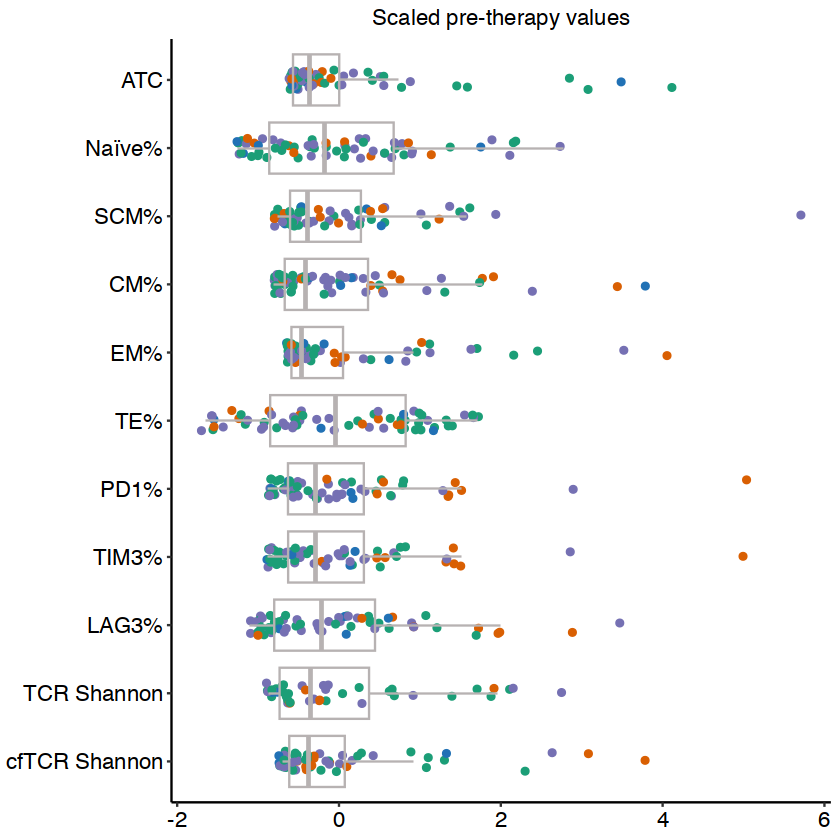

In [95]:
p2

In [96]:
pdf( paste0(plotpath, "X01.pdf"), width = 6, height = 8)
cowplot::plot_grid(p2, labels = "A")# + theme(legend.position = "bottom")
dev.off()

pdf 
  2

LR and forestplot

Use unscaled data for glm

In [97]:
mycol <- c(
  "cfShannon", "observed_Shannon",
  "LAG3%", "TIM3%", "PD1%", "TE%", "EM%", "CM%", "SCM%", "Naïve%", "ATC"
)


In [98]:
colnames(df_x01)

[1] "Patient"                 "ATC"                    
 [3] "Naïve%"                  "SCM%"                   
 [5] "CM%"                     "EM%"                    
 [7] "TE%"                     "PD1%"                   
 [9] "LAG3%"                   "TIM3%"                  
[11] "observed_Shannon"        "cfShannon"              
[13] "cancergroup"             "EM%_scaled"             
[15] "CM%_scaled"              "Naïve%_scaled"          
[17] "SCM%_scaled"             "TE%_scaled"             
[19] "PD1%_scaled"             "TIM3%_scaled"           
[21] "LAG3%_scaled"            "ATC_scaled"             
[23] "observed_Shannon_scaled" "cfShannon_scaled"

In [99]:
rev(mycol)

[1] "ATC"              "Naïve%"           "SCM%"             "CM%"             
 [5] "EM%"              "TE%"              "PD1%"             "TIM3%"           
 [9] "LAG3%"            "observed_Shannon" "cfShannon"

In [100]:
df_x01$Relapse <- pbmc$Relapse[ match(df_x01$Patient, pbmc$Patient) ]

In [101]:
df_x01_long <- tidyr::pivot_longer(df_x01, all_of(rev(mycol)), names_to = "Feature", values_to = "X01")

In [102]:
df_x01_long <- as.data.frame(df_x01_long)

In [103]:
df_x01_long_narm <- df_x01_long[ !is.na(df_x01_long$X01),]

In [104]:
length(unique(df_x01_long_narm$Patient))

[1] 85

In [111]:
feat_lr_mat <- matrix(nrow = length(unique(df_x01_long_narm$Feature)), ncol = 7)
rownames(feat_lr_mat) <- unique(df_x01_long_narm$Feature)
colnames(feat_lr_mat) <- c('coef', 'exp(coef)', 'SE', 'z', 'Pr(>|z|)', 'lower.95' ,'upper.95')

In [112]:
for (i in rownames(feat_lr_mat)) {
    # message(i)
    f <- as.formula(paste0("Relapse~`", i, "`")) # univariate
    lrmodel <- glm(f, data = df_x01, family = "binomial")
    sumlrmodel <- summary(lrmodel)
    print(sumlrmodel)
    myCI <- exp(confint.default(lrmodel, level = 0.95))

    feat_lr_mat[i, "coef"] <- sumlrmodel$coefficients[2, "Estimate"]
    # exp of estimate is the odds ratio
    feat_lr_mat[i, "exp(coef)"] <- exp(sumlrmodel$coefficients[2, "Estimate"])
    feat_lr_mat[i, "SE"] <- sumlrmodel$coefficients[2, "Std. Error"]
    feat_lr_mat[i, "z"] <- sumlrmodel$coefficients[2, "z value"]
    feat_lr_mat[i, "Pr(>|z|)"] <- sumlrmodel$coefficients[2, "Pr(>|z|)"]
    # from myCI
    feat_lr_mat[i, "lower.95"] <- myCI[2, 1]
    feat_lr_mat[i, "upper.95"] <- myCI[2, 2]
}



Call:
glm(formula = f, family = "binomial", data = df_x01)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8153  -0.5734  -0.5565  -0.5514   1.9792  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.8066429  0.4053320  -4.457  8.3e-06 ***
ATC          0.0001294  0.0002068   0.626    0.531    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 55.475  on 63  degrees of freedom
Residual deviance: 55.114  on 62  degrees of freedom
  (21 observations deleted due to missingness)
AIC: 59.114

Number of Fisher Scoring iterations: 4


Call:
glm(formula = f, family = "binomial", data = df_x01)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6626  -0.6135  -0.5652  -0.5003   2.0926  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -1.40184    0.53911  -2.600  0.00931 **
`Naïve%`    -0.01093 

In [113]:
feat_lr_mat

,coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95
ATC,0.0001294473,1.0001295,0.0002068258,0.62587575,0.5313964,0.9997241,1.000535
Naïve%,-0.0109269659,0.9891325,0.0160503492,-0.68079303,0.4960025,0.9585006,1.020743
SCM%,0.0575297963,1.0592168,0.0358012671,1.60692067,0.1080718,0.9874401,1.136211
CM%,0.0017589316,1.0017605,0.0293185270,0.05999386,0.9521605,0.9458187,1.061011
EM%,-0.1059940097,0.8994300,0.0945748699,-1.12074180,0.2623978,0.7472486,1.082604
TE%,0.0032037857,1.0032089,0.0122562344,0.26140049,0.7937837,0.9793972,1.027600
PD1%,-0.0023094237,0.9976932,0.0283180158,-0.08155316,0.9350020,0.9438276,1.054633
TIM3%,-0.0021773887,0.9978250,0.0282449565,-0.07708947,0.9385524,0.9440874,1.054621
LAG3%,-0.0219359911,0.9783029,0.0477366984,-0.45952049,0.6458604,0.8909222,1.074254
cfShannon,0.0116657386,1.0117340,0.0323916924,0.36014600,0.7187380,0.9494990,1.078048


In [114]:
fdr_df <- as.matrix(p.adjust(feat_lr_mat[, 5], method = "fdr"))
colnames(fdr_df)[1] <- "fdr"
feat_lr_mat <- cbind(feat_lr_mat, fdr_df)


In [115]:
feat_lr_mat <- as.data.frame(feat_lr_mat)

In [116]:
feat_lr_mat$Feature <- rownames(feat_lr_mat)

feat_lr_mat$Feature[feat_lr_mat$Feature == "cfShannon"] <- "cfTCR Shannon"
feat_lr_mat$Feature[feat_lr_mat$Feature == "observed_Shannon"] <- "TCR Shannon"

In [117]:
feat_lr_mat

,coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95,fdr,Feature
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ATC,0.0001294473,1.0001295,0.0002068258,0.62587575,0.5313964,0.9997241,1.000535,0.9521605,ATC
Naïve%,-0.0109269659,0.9891325,0.0160503492,-0.68079303,0.4960025,0.9585006,1.020743,0.9521605,Naïve%
SCM%,0.0575297963,1.0592168,0.0358012671,1.60692067,0.1080718,0.9874401,1.136211,0.9521605,SCM%
CM%,0.0017589316,1.0017605,0.0293185270,0.05999386,0.9521605,0.9458187,1.061011,0.9521605,CM%
EM%,-0.1059940097,0.8994300,0.0945748699,-1.12074180,0.2623978,0.7472486,1.082604,0.9521605,EM%
TE%,0.0032037857,1.0032089,0.0122562344,0.26140049,0.7937837,0.9793972,1.027600,0.9521605,TE%
PD1%,-0.0023094237,0.9976932,0.0283180158,-0.08155316,0.9350020,0.9438276,1.054633,0.9521605,PD1%
TIM3%,-0.0021773887,0.9978250,0.0282449565,-0.07708947,0.9385524,0.9440874,1.054621,0.9521605,TIM3%
LAG3%,-0.0219359911,0.9783029,0.0477366984,-0.45952049,0.6458604,0.8909222,1.074254,0.9521605,LAG3%


In [118]:
feat_lr_mat$Feature <- factor(feat_lr_mat$Feature,
  levels = c("cfTCR Shannon", "TCR Shannon","LAG3%","TIM3%",  "PD1%", "TE%", "EM%", "CM%", "SCM%", "Naïve%", "ATC")
)

# reverse the levels
feat_lr_mat$Feature <- factor(feat_lr_mat$Feature,
  levels = rev(levels(feat_lr_mat$Feature))
)
# order mat by Feature levels
feat_lr_mat <- feat_lr_mat[ order(feat_lr_mat$Feature), ]

In [119]:
feat_lr_mat$mean <- feat_lr_mat$`exp(coef)`
feat_lr_mat$lower <- feat_lr_mat$`lower.95`
feat_lr_mat$upper <- feat_lr_mat$`upper.95`

In [120]:
feat_lr_mat$OR <- as.character(round(feat_lr_mat$`exp(coef)`, 2) )
feat_lr_mat$p <- as.character(round(feat_lr_mat$`Pr(>|z|)`, 2) )
feat_lr_mat$FDR <- as.character(round(feat_lr_mat$fdr, 2) )

In [121]:
p3 <- feat_lr_mat |>
  forestplot(
    labeltext = c(Feature, OR, p, FDR),
    clip = c(0.5, 1.5),
    boxsize = 0.2,
    vertices = TRUE,
    xlog = FALSE, zero = 1,
    xticks = c(0.5,0.75, 1,1.25, 1.5)
  ) |>
  fp_set_style(
    box = "royalblue",
    line = "darkblue",
    summary = "royalblue"
  ) |>
  fp_add_header(
    Feature = c("", "Feature"),
    OR = c("", "OR"),
    p = c("", "p value"),
    FDR = c("", "FDR")
  )


In [122]:
width

ERROR: Error in eval(expr, envir, enclos): object 'width' not found


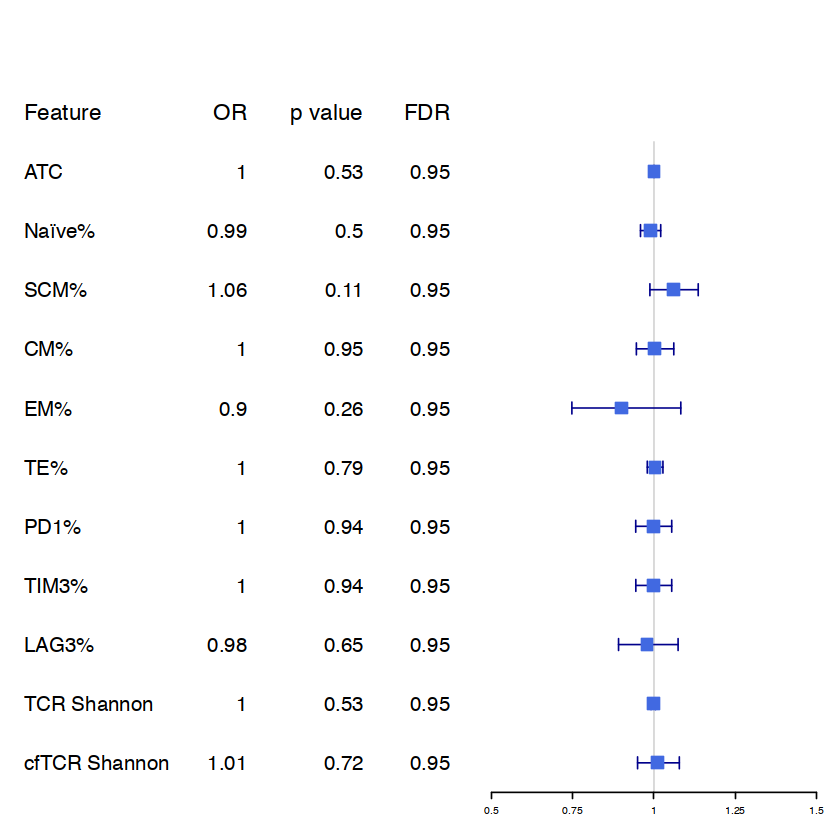

In [123]:
library(grid)
grid.newpage()
pushViewport(viewport(layout = grid.layout(
    nrow = 1,
    ncol = 3,
    widths = c(unit(1, "npc"), unit(10, "pt"), unit(10, "npc"), unit(10, "npc"), unit(1000, "npc"))
    )
))
p3



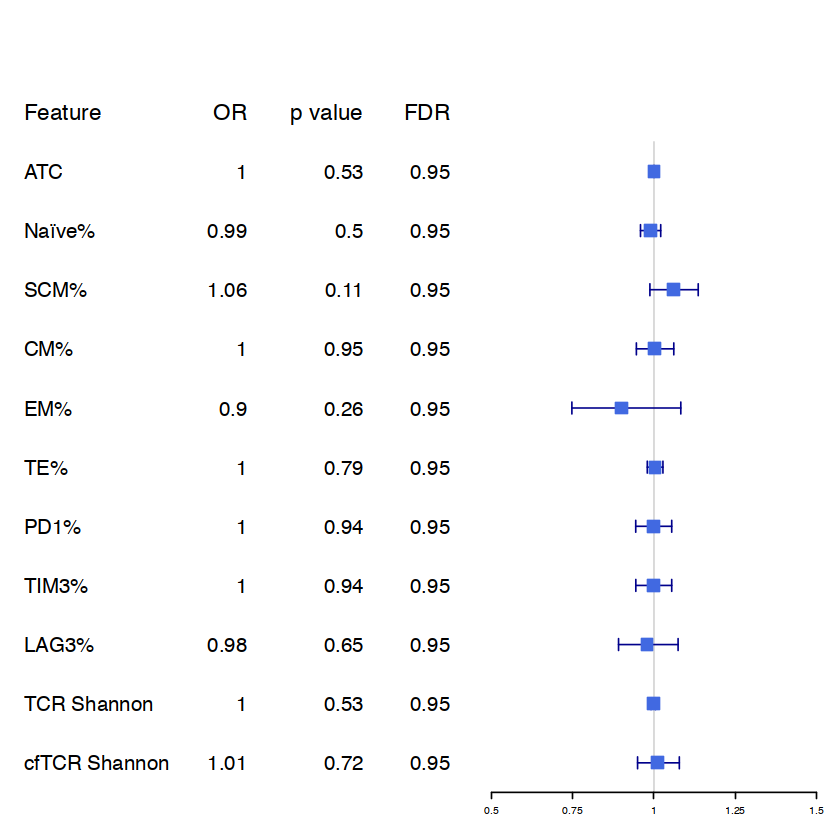

In [124]:
p3

In [125]:
pdf(paste0(plotpath, "forestplot_X01.pdf"), width=5, height=8)
p3
dev.off()

pdf 
  2